<a href="https://colab.research.google.com/github/panagiotakf/Predicting-Fuel-Consumption-in-Shipping-by-Using-ML/blob/main/Federated_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # for easy dataset import
import sklearn # for simple ML models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # for data scaling in [0,1]
import pickle # for saving sklearn models
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score,f1_score
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [3]:
# 1. Importing the dataset
dataset = pd.read_csv('cape1.csv')
X = dataset.iloc[:, [0, 1, 4, 5, 8]].values # keep only SOG, STW, DWS, WD and Trim,bring all the rows but keep only the defined columns
y = dataset.iloc[:, 9].values # keep target variable MEP
y = y.reshape(-1, 1) # reshape as 2D array (N,1) (-1 because we are not sure about the number of rows)
X=X.reshape(-1,5) #do we need to reshape X too???

In [4]:
print(type(X))
print(len(y))
#σπάω το dataset στα δύο, ώστε να προσομοιώσω δύο διαφορετικά πλοία
X1=X[0:len(X)//2]
X2=X[len(X)//2:]
y1=y[0:len(X)//2]
y2=y[len(X)//2:]
print(len(X1))
print(len(X2))
print(len(y1))
print(len(y2))

<class 'numpy.ndarray'>
21275
10637
10638
10637
10638


In [5]:
#split train and test set for both datasets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1,random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.1,random_state=17)

In [6]:
# MinMaxScaling for each dataset independently
scaler_data1=MinMaxScaler()
scaler_labels1=MinMaxScaler()

X1_train=scaler_data1.fit_transform(X1_train)
y1_train=scaler_labels1.fit_transform(y1_train)

X1_test=scaler_data1.transform(X1_test)
y1_test=scaler_labels1.transform(y1_test)

scaler_data2=MinMaxScaler()
scaler_labels2=MinMaxScaler()

X2_train=scaler_data2.fit_transform(X2_train)
y2_train=scaler_labels2.fit_transform(y2_train)

X2_test=scaler_data2.transform(X2_test)
y2_test=scaler_labels2.transform(y2_test)


In [7]:
# θα φτιάξουμε ένα παρόμοιο MLP που θα επεξεργαστεί καθένα από τα σύνολα δεδομένων
tf.random.set_seed(42)

model = Sequential([
    Dense(400, activation='relu'),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)
])

model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=Adam(),
    metrics='mean_squared_error'
)
print(type(model))

<class 'keras.src.engine.sequential.Sequential'>


In [8]:
model1=model.fit(X1_train, y1_train, epochs=100)

Epoch 1/100
300/300 [==============================] - 3s 4ms/step - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 2/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 3/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0058 - mean_squared_error: 0.0058
Epoch 4/100
300/300 [==============================] - 1s 3ms/step - loss: 0.0053 - mean_squared_error: 0.0053
Epoch 5/100
300/300 [==============================] - 1s 3ms/step - loss: 0.0048 - mean_squared_error: 0.0048
Epoch 6/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0044 - mean_squared_error: 0.0044
Epoch 7/100
300/300 [==============================] - 1s 3ms/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 8/100
300/300 [==============================] - 1s 3ms/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 9/100
300/300 [==============================] - 1s 5ms/step - loss: 0.0037 - mean_squared_error: 0.0037
E

In [9]:
model2=model.fit(X2_train, y2_train, epochs=100)

Epoch 1/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 2/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 3/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 4/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 5/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 6/100
300/300 [==============================] - 2s 6ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 7/100
300/300 [==============================] - 2s 6ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 8/100
300/300 [==============================] - 1s 5ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Epoch 9/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0011 - mean_squared_error: 0.0011
E

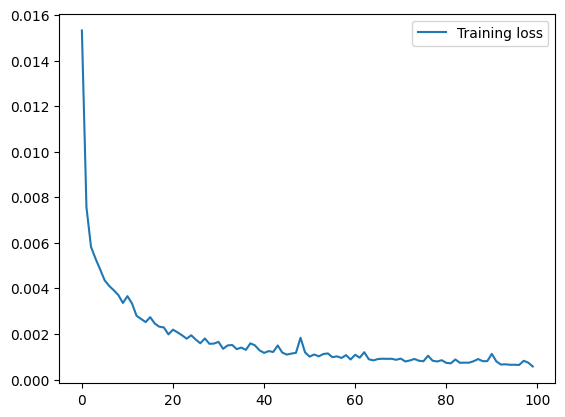

In [10]:
plt.plot(model1.history['loss'], label='Training loss')
plt.legend()

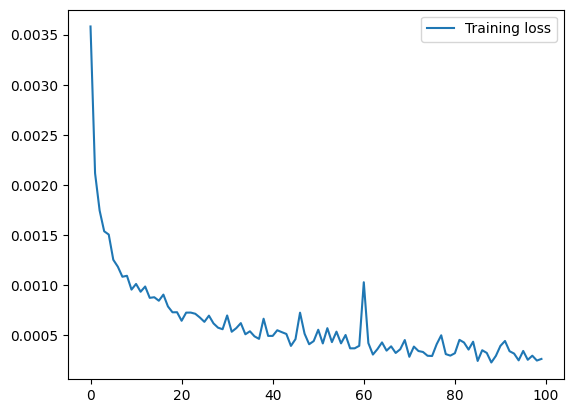

In [11]:
plt.plot(model2.history['loss'], label='Training loss')
plt.legend()

In [12]:
class SimpleMLP:
    @staticmethod
    def build(shape):
        model = Sequential([
            Dense(400, activation='relu',input_shape=(shape,)),
            Dense(200, activation='relu'),
            Dense(100, activation='relu'),
            Dense(1)
        ])
        return model


In [13]:
def weight_scalling_factor(clients_list, client_name):
    #first calculate the total training data points across clinets
    global_count = sum([len(client) for client in clients_list])
    # get the total number of data points held by a client
    local_count = len(client_name)
    return local_count/global_count


def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final



def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)

    return avg_grad

def test_model(X_test, Y_test,  model, comm_round):
    mse = tf.keras.losses.MeanSquaredError()
    #logits = model.predict(X_test, batch_size=100)
    logits = model.predict(X_test)
    loss = mse(Y_test, logits)
    print('comm_round: {} | global_loss: {}'.format(comm_round, loss))
    return loss


In [14]:
weight_scalling_factor([X1,X2],X2)

0.5000235017626322

In [36]:
#
comms_round=20
clients=[X1_train,X2_train]
client_labels=[y1_train,y2_train]
#initialize global model
smlp_global = SimpleMLP()
global_model = smlp_global.build(5)
#print(type(global_model))

#commence global training loop
for comm_round in range(comms_round):

    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()
    #print(global_weights[0])

    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    #client_names= list(clients_batched.keys())
    #random.shuffle(client_names)

    #loop through each client and create new local model
    for client in range(0,len(clients)):
        smlp_local = SimpleMLP()
        local_model = smlp_local.build(5)
        local_model.compile(
            loss=tf.keras.losses.MeanSquaredError(),
            optimizer=Adam(),
            metrics='mean_squared_error'
        )

        #set local model weight to the weight of the global model
        local_model.set_weights(global_weights)

        #fit local model with client's data
        local_model.fit(clients[client],client_labels[client], epochs=1, verbose=0)

        #scale the model weights and add to list
        scaling_factor = weight_scalling_factor(clients, clients[client])
        scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
        scaled_local_weight_list.append(scaled_weights)

        #clear session to free memory after each communication round
        K.clear_session()

    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)
    #print(average_weights[0])

    #update global model
    global_model.set_weights(average_weights)


    #test global model and print out metrics after each communications round

    for(X_test, Y_test) in [(X1_test,y1_test),(X2_test,y2_test)]:
        global_loss = test_model(X_test, Y_test, global_model, comm_round)

34/34 [==============================] - 0s 2ms/step
comm_round: 0 | global_loss: 0.04874616116285324
34/34 [==============================] - 0s 2ms/step
comm_round: 0 | global_loss: 0.024521369487047195
34/34 [==============================] - 0s 2ms/step
comm_round: 1 | global_loss: 0.037090424448251724
34/34 [==============================] - 0s 2ms/step
comm_round: 1 | global_loss: 0.008530477993190289
34/34 [==============================] - 0s 3ms/step
comm_round: 2 | global_loss: 0.03855486586689949
34/34 [==============================] - 0s 3ms/step
comm_round: 2 | global_loss: 0.006335500627756119
34/34 [==============================] - 0s 2ms/step
comm_round: 3 | global_loss: 0.034927934408187866
34/34 [==============================] - 0s 2ms/step
comm_round: 3 | global_loss: 0.006285952869802713
34/34 [==============================] - 0s 2ms/step
comm_round: 4 | global_loss: 0.03296917304396629
34/34 [==============================] - 0s 2ms/step
comm_round: 4 | global_